In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 1: Load Titanic Dataset
data = sns.load_dataset('titanic')

In [ ]:
data = data[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town']]

In [ ]:
data.head()

,survived,pclass,sex,age,fare,embark_town
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   embark_town  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,survived,pclass,sex,age,fare,embark_town
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [ ]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embark_town'] = data['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})

In [ ]:
X = data[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Step 6: Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
accuracy

0.7902097902097902

In [ ]:
conf_matrix

array([[73,  7],
       [23, 40]])

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



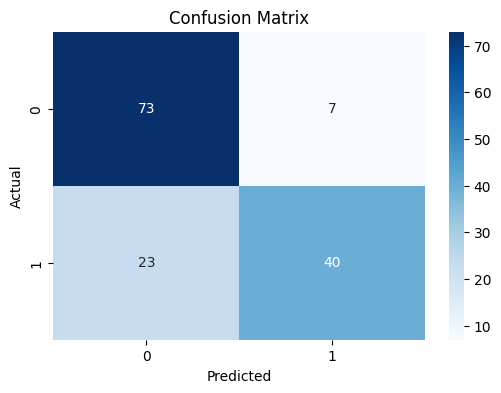

In [ ]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Grid for 'lbfgs' solver
param_grid_lbfgs = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}

grid_lbfgs = GridSearchCV(LogisticRegression(), param_grid_lbfgs, cv=5)
grid_lbfgs.fit(X_train, y_train)

# Grid for 'liblinear' solver
param_grid_liblinear = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

grid_liblinear = GridSearchCV(LogisticRegression(), param_grid_liblinear, cv=5)
grid_liblinear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [ ]:
print(grid_lbfgs.best_estimator_)

LogisticRegression(C=0.01)


In [ ]:
print(grid_lbfgs.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
model = LogisticRegression(C = 0.01, penalty='l2', solver = 'lbfgs', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [ ]:
# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy: ",accuracy)
print("Confusion Matrix: \n",conf_matrix)
print("Classification Report: \n",class_report)

Accuracy:  0.7902097902097902
Confusion Matrix: 
 [[73  7]
 [23 40]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

